<a href="https://colab.research.google.com/github/210143cse-lgtm/rps-cnn-classification/blob/main/210143_RPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================================================
# STEP 1: INITIAL SETUP - Install and Import Libraries
# ============================================================================

print("="*70)
print("ROCK-PAPER-SCISSORS CNN CLASSIFICATION")
print("ID: 210143cse-lgtm")
print("="*70)

# Install required packages
!pip install -q torch torchvision matplotlib seaborn numpy pandas pillow scikit-learn tqdm tabulate

# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import random
import zipfile
import urllib.request
import glob
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from tqdm import tqdm
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(f"PyTorch version: {torch.__version__}")

# Class names for Rock-Paper-Scissors
class_names = ['rock', 'paper', 'scissors']
print(f"Classes: {class_names}")

ROCK-PAPER-SCISSORS CNN CLASSIFICATION
ID: 210143cse-lgtm
Using device: cuda
PyTorch version: 2.9.0+cu126
Classes: ['rock', 'paper', 'scissors']


In [ ]:
# ============================================================================
# STEP 2: GITHUB REPOSITORY SETUP - Clone Repository
# ============================================================================

print("="*70)
print("GITHUB REPOSITORY SETUP")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Use !git clone [your-repo-link] inside the notebook to download your custom phone images'")

# Your GitHub repository URL
REPO_URL = "https://github.com/210143cse-lgtm/rps-cnn-classification.git"

# Clone repository (as per assignment requirement)
print("\n🔗 Cloning GitHub repository...")
!rm -rf rps-cnn-classification 2>/dev/null
!git clone -q {REPO_URL}

# Verify clone
print("\n📁 Verifying repository structure...")
!ls -la rps-cnn-classification/

# Set paths (as per assignment folder structure)
REPO_PATH = '/content/rps-cnn-classification'
CUSTOM_IMAGES_PATH = os.path.join(REPO_PATH, 'dataset', 'custom_images')
MODEL_PATH = os.path.join(REPO_PATH, 'model', '210143.pth')
RESULTS_PATH = os.path.join(REPO_PATH, 'results')

# Create necessary directories if they don't exist
os.makedirs(CUSTOM_IMAGES_PATH, exist_ok=True)

model_dir = os.path.dirname(MODEL_PATH)
# Check if a file named 'model' exists and remove it to avoid conflict with creating a directory
if os.path.isfile(model_dir):
    print(f"⚠️ Found a file conflicting with directory: {model_dir}. Removing file...")
    os.remove(model_dir)
os.makedirs(model_dir, exist_ok=True)

results_dir = RESULTS_PATH
# Check if a file named 'results' exists and remove it to avoid conflict with creating a directory
if os.path.isfile(results_dir):
    print(f"⚠️ Found a file conflicting with directory: {results_dir}. Removing file...")
    os.remove(results_dir)
os.makedirs(results_dir, exist_ok=True)

print(f"\n✅ GitHub repository cloned successfully!")
print(f"📁 Repository path: {REPO_PATH}")
print(f"📸 Custom images path: {CUSTOM_IMAGES_PATH}")
print(f"🤖 Model save path: {MODEL_PATH}")
print(f"📊 Results path: {RESULTS_PATH}")

# Check if custom images exist (assignment requirement)
print(f"\n🔍 Checking for custom phone images...")
if os.path.exists(CUSTOM_IMAGES_PATH):
    files = os.listdir(CUSTOM_IMAGES_PATH)
    jpg_files = [f for f in files if f.lower().endswith('.jpg')]
    print(f"Found {len(jpg_files)} JPG files in custom_images/")
    if jpg_files:
        print("First 5 files:")
        for f in jpg_files[:5]:
            print(f"  - {f}")
else:
    print(f"⚠️ Custom images directory not found!")
    print("Please ensure your GitHub repository has the correct folder structure.")

GITHUB REPOSITORY SETUP
📋 ASSIGNMENT REQUIREMENT:
• 'Use !git clone [your-repo-link] inside the notebook to download your custom phone images'

🔗 Cloning GitHub repository...

📁 Verifying repository structure...
total 32
drwxr-xr-x 4 root root 4096 Dec 25 21:11 .
drwxr-xr-x 1 root root 4096 Dec 25 21:11 ..
-rw-r--r-- 1 root root  806 Dec 25 21:11 210143_RPS.ipynb
drwxr-xr-x 3 root root 4096 Dec 25 21:11 dataset
drwxr-xr-x 8 root root 4096 Dec 25 21:11 .git
-rw-r--r-- 1 root root    1 Dec 25 21:11 model
-rw-r--r-- 1 root root   89 Dec 25 21:11 README.md
-rw-r--r-- 1 root root    1 Dec 25 21:11 results
⚠️ Found a file conflicting with directory: /content/rps-cnn-classification/model. Removing file...
⚠️ Found a file conflicting with directory: /content/rps-cnn-classification/results. Removing file...

✅ GitHub repository cloned successfully!
📁 Repository path: /content/rps-cnn-classification
📸 Custom images path: /content/rps-cnn-classification/dataset/custom_images
🤖 Model save path: /c

In [ ]:
# ============================================================================
# STEP 3: DATA LOADING AUTOMATION - Download Standard Dataset
# ============================================================================

print("="*70)
print("DATA LOADING AUTOMATION")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Load the standard training data'")
print("• 'Automatic data retrieval: The notebook must automatically pull the standard dataset'")

print("\n📥 Downloading Rock-Paper-Scissors dataset...")

# Download dataset from TensorFlow
# Corrected URL after 404 error
dataset_url = "https://storage.googleapis.com/learning-datasets/rps.zip"
urllib.request.urlretrieve(dataset_url, 'rps.zip')

# Extract dataset
with zipfile.ZipFile('rps.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

print("\n✅ Dataset downloaded and extracted!")
print("\n📁 Dataset structure:")
!find /content/rps -type d | head -10

# Count images
print("\n📊 Image counts:")
for class_name in class_names:
    count = len(os.listdir(f'/content/rps/{class_name}'))
    print(f"  {class_name}: {count} images")

DATA LOADING AUTOMATION
📋 ASSIGNMENT REQUIREMENT:
• 'Load the standard training data'
• 'Automatic data retrieval: The notebook must automatically pull the standard dataset'

📥 Downloading Rock-Paper-Scissors dataset...

✅ Dataset downloaded and extracted!

📁 Dataset structure:
/content/rps
/content/rps/rock
/content/rps/paper
/content/rps/scissors

📊 Image counts:
  rock: 840 images
  paper: 840 images
  scissors: 840 images


In [ ]:
# ============================================================================
# STEP 4: DATA PREPROCESSING - Define Transforms
# ============================================================================

print("="*70)
print("DATA PREPROCESSING")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Data Preprocessing: Use torchvision.transforms for resizing, normalization, and tensor conversion'")
print("• 'Transforms: You must define a transform pipeline to Resize, Convert to Tensor, and Normalize'")

# Load sample image to determine original size
sample_img_path = glob.glob('/content/rps/rock/*.png')[0]
sample_img = Image.open(sample_img_path)
print(f"\n📏 Original image size: {sample_img.size}")
print(f"   Image mode: {sample_img.mode}")

# Define transforms for training (as per assignment requirement)
print("\n🔧 Defining transform pipelines...")
transform_train = transforms.Compose([
    transforms.Resize((150, 150)),          # Resize to consistent size
    transforms.RandomRotation(20),          # Data augmentation
    transforms.RandomHorizontalFlip(),      # Data augmentation
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Data augmentation
    transforms.ToTensor(),                  # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize
])

# Define transforms for testing
transform_test = transforms.Compose([
    transforms.Resize((150, 150)),          # Same resize as training
    transforms.ToTensor(),                  # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Same normalization
])

# Define transforms for custom images (MUST match training transforms exactly)
transform_custom = transforms.Compose([
    transforms.Resize((150, 150)),          # EXACT same size as training
    transforms.ToTensor(),                  # EXACT same conversion
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # EXACT same values
])

print("✅ Transform pipelines defined!")
print(f"   Target size: 150x150 pixels")
print(f"   Normalization mean: [0.485, 0.456, 0.406]")
print(f"   Normalization std: [0.229, 0.224, 0.225]")

DATA PREPROCESSING
📋 ASSIGNMENT REQUIREMENT:
• 'Data Preprocessing: Use torchvision.transforms for resizing, normalization, and tensor conversion'
• 'Transforms: You must define a transform pipeline to Resize, Convert to Tensor, and Normalize'

📏 Original image size: (300, 300)
   Image mode: RGBA

🔧 Defining transform pipelines...
✅ Transform pipelines defined!
   Target size: 150x150 pixels
   Normalization mean: [0.485, 0.456, 0.406]
   Normalization std: [0.229, 0.224, 0.225]


In [ ]:
# ============================================================================
# STEP 5: CUSTOM DATASET CREATION - Load and Prepare Data
# ============================================================================

print("="*70)
print("CUSTOM DATASET CREATION AND DATALOADER")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'DataLoader: Create DataLoader objects for Training and Validation'")
print("• 'Load your custom images using PIL or OpenCV'")

class RPSDataset(Dataset):
    """Custom Dataset for Rock-Paper-Scissors images"""
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        # Convert numpy array to PIL Image
        if isinstance(image, np.ndarray):
            image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)

        return image, label

# Load training and testing data
print("\n📂 Loading dataset...")
train_images = []
train_labels = []
test_images = []
test_labels = []

for label, class_name in enumerate(class_names):
    # Get all image paths
    image_paths = glob.glob(f'/content/rps/{class_name}/*.png')
    random.shuffle(image_paths)

    # Split: 80% train, 20% test
    split_idx = int(0.8 * len(image_paths))
    train_paths = image_paths[:split_idx]
    test_paths = image_paths[split_idx:]

    # Load training images
    print(f"  Loading {len(train_paths)} {class_name} training images...")
    for path in train_paths:
        img = Image.open(path).convert('RGB')
        train_images.append(np.array(img))
        train_labels.append(label)

    # Load testing images
    print(f"  Loading {len(test_paths)} {class_name} testing images...")
    for path in test_paths:
        img = Image.open(path).convert('RGB')
        test_images.append(np.array(img))
        test_labels.append(label)

# Convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

print(f"\n📊 Dataset Statistics:")
print(f"  Training images: {len(train_images)}")
print(f"  Testing images:  {len(test_images)}")
print(f"  Total images:    {len(train_images) + len(test_images)}")

# Create datasets
train_dataset = RPSDataset(train_images, train_labels, transform=transform_train)
test_dataset = RPSDataset(test_images, test_labels, transform=transform_test)

# Create data loaders (as per assignment requirement: batch_size=64)
print("\n📦 Creating DataLoaders...")
batch_size = 64  # As specified in assignment
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print(f"✅ DataLoaders created successfully!")
print(f"  Training batches: {len(train_loader)}")
print(f"  Testing batches:  {len(test_loader)}")
print(f"  Batch size:       {batch_size} (as per assignment requirement)")

CUSTOM DATASET CREATION AND DATALOADER
📋 ASSIGNMENT REQUIREMENT:
• 'DataLoader: Create DataLoader objects for Training and Validation'
• 'Load your custom images using PIL or OpenCV'

📂 Loading dataset...
  Loading 672 rock training images...
  Loading 168 rock testing images...
  Loading 672 paper training images...
  Loading 168 paper testing images...
  Loading 672 scissors training images...
  Loading 168 scissors testing images...

📊 Dataset Statistics:
  Training images: 2016
  Testing images:  504
  Total images:    2520

📦 Creating DataLoaders...
✅ DataLoaders created successfully!
  Training batches: 32
  Testing batches:  8
  Batch size:       64 (as per assignment requirement)


VISUALIZING TRAINING DATA
Displaying 9 sample training images...


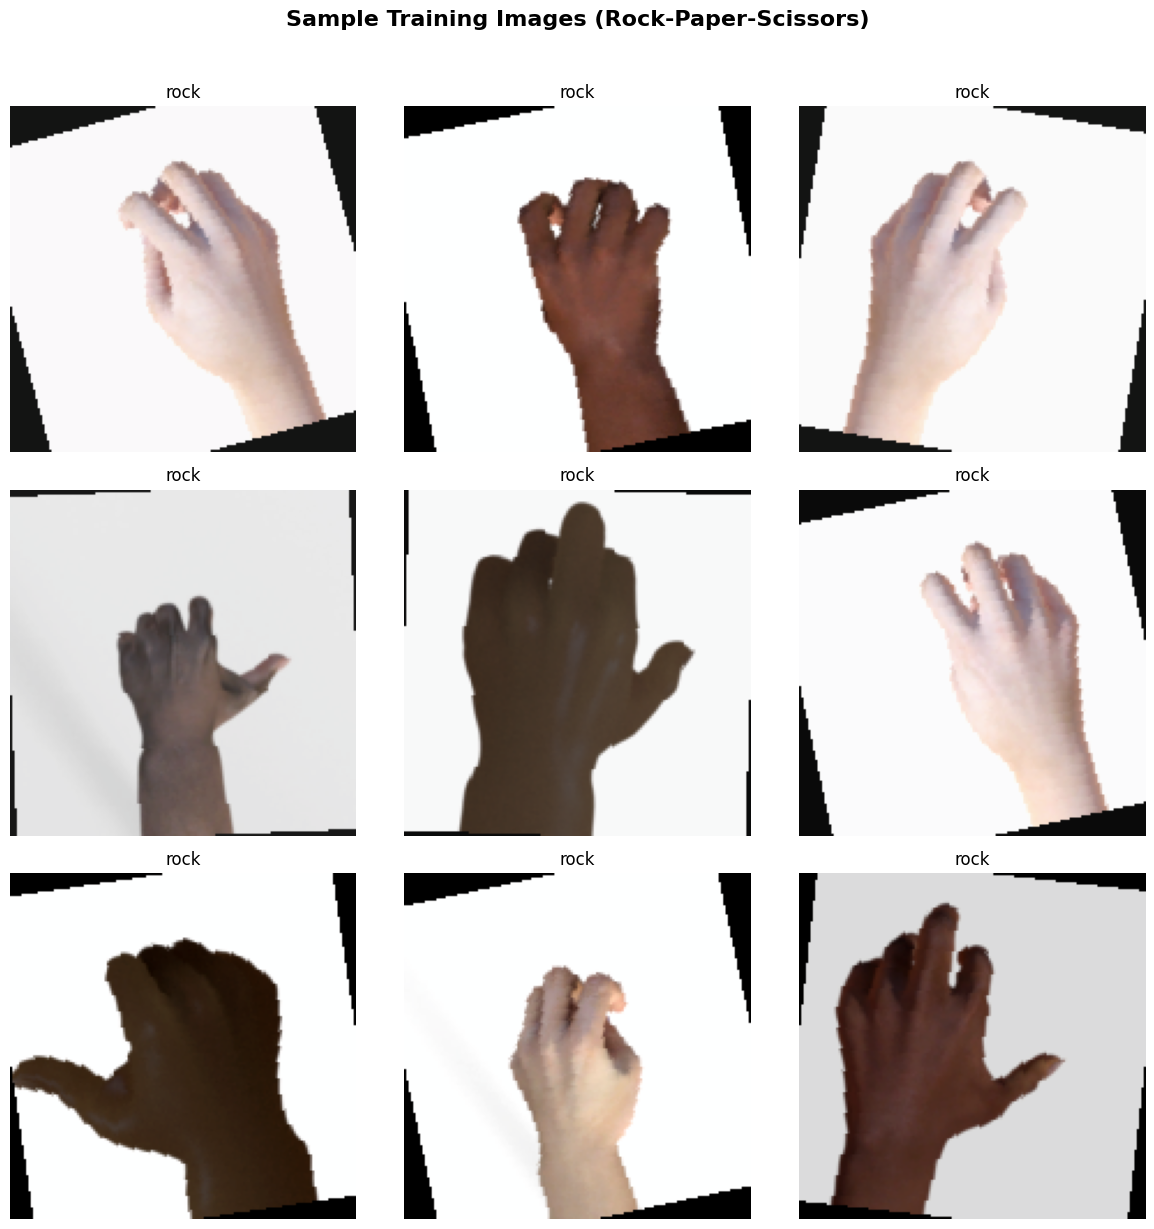


🔍 Showing image transformations:


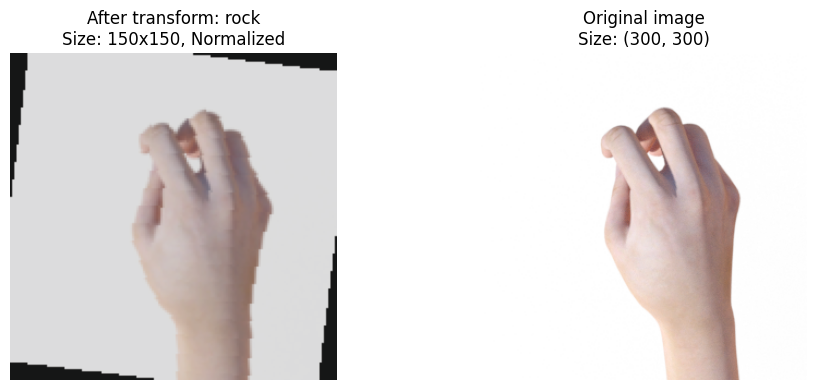

In [ ]:
# ============================================================================
# STEP 6: VISUALIZE TRAINING DATA
# ============================================================================

print("="*70)
print("VISUALIZING TRAINING DATA")
print("="*70)

def imshow(img, title=None, ax=None):
    """Display image tensor"""
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)

    if ax is None:
        plt.imshow(img)
        if title:
            plt.title(title)
        plt.axis('off')
    else:
        ax.imshow(img)
        if title:
            ax.set_title(title)
        ax.axis('off')

# Display 9 sample images from training set
print("Displaying 9 sample training images...")
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i in range(9):
    img, label = train_dataset[i]
    row = i // 3
    col = i % 3
    imshow(img, f'{class_names[label]}', ax=axes[row, col])

plt.suptitle('Sample Training Images (Rock-Paper-Scissors)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Show transformed vs original
print("\n🔍 Showing image transformations:")
img, label = train_dataset[0]
img_np = img.numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
img_np = std * img_np + mean
img_np = np.clip(img_np, 0, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.imshow(img_np)
ax1.set_title(f'After transform: {class_names[label]}\nSize: 150x150, Normalized')
ax1.axis('off')

# Show original from dataset
orig_img = Image.fromarray(train_images[0])
ax2.imshow(orig_img)
ax2.set_title(f'Original image\nSize: {orig_img.size}')
ax2.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# STEP 7: CNN MODEL BUILDING - Define Model Architecture
# ============================================================================

print("="*70)
print("CNN MODEL BUILDING")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Model Architecture: Build a Convolutional Neural Network (CNN) class inheriting from nn.Module'")
print("• 'Define a class class CNN(nn.Module): that includes:'")
print("  ○ nn.Conv2d layers (Convolution)")
print("  ○ nn.ReLU() activations")
print("  ○ nn.MaxPool2d layers")
print("  ○ nn.Linear layers (Fully connected)")
print("• 'Forward Pass: Define the forward(self, x) method to outline the data flow'")

class RPS_CNN(nn.Module):
    """CNN model for Rock-Paper-Scissors classification"""
    def __init__(self, num_classes=3):
        super(RPS_CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, 2)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 9 * 9, 512)
        self.relu5 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(512, 128)
        self.relu6 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.dropout1(self.relu5(self.fc1(x)))
        x = self.dropout2(self.relu6(self.fc2(x)))
        x = self.fc3(x)

        return x

# Initialize model
model = RPS_CNN(num_classes=3).to(device)

print("✅ CNN model built successfully!")
print("\n📐 Model Architecture:")
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\n📊 Model Parameters:")
print(f"  Total parameters: {total_params:,}")
print(f"  Trainable parameters: {trainable_params:,}")
print(f"  Non-trainable parameters: {total_params - trainable_params:,}")

CNN MODEL BUILDING
📋 ASSIGNMENT REQUIREMENT:
• 'Model Architecture: Build a Convolutional Neural Network (CNN) class inheriting from nn.Module'
• 'Define a class class CNN(nn.Module): that includes:'
  ○ nn.Conv2d layers (Convolution)
  ○ nn.ReLU() activations
  ○ nn.MaxPool2d layers
  ○ nn.Linear layers (Fully connected)
• 'Forward Pass: Define the forward(self, x) method to outline the data flow'
✅ CNN model built successfully!

📐 Model Architecture:
RPS_CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mod

In [ ]:
# ============================================================================
# STEP 8: TRAINING LOOP - Define Training Functions
# ============================================================================

print("="*70)
print("TRAINING LOOP DEFINITION")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Loss Function: Use nn.CrossEntropyLoss'")
print("• 'Optimizer: Use torch.optim.Adam or SGD'")
print("• 'Loop: Write a loop that iterates through epochs and batches:'")
print("  ○ optimizer.zero_grad()")
print("  ○ loss.backward()")
print("  ○ optimizer.step()")

def train_epoch(model, loader, criterion, optimizer, device):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(loader, desc='Training', leave=False)
    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize (as per assignment requirements)
        optimizer.zero_grad()      # Zero the gradients
        loss.backward()           # Backward pass
        optimizer.step()          # Update weights

        # Statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        # Update progress bar
        progress_bar.set_postfix({
            'loss': running_loss/len(loader),
            'acc': 100.*correct/total
        })

    epoch_loss = running_loss / len(loader)
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc

def validate(model, loader, criterion, device):
    """Validate model"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        progress_bar = tqdm(loader, desc='Validation', leave=False)
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            progress_bar.set_postfix({
                'loss': running_loss/len(loader),
                'acc': 100.*correct/total
            })

    epoch_loss = running_loss / len(loader)
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc

print("✅ Training functions defined with all required components!")

TRAINING LOOP DEFINITION
📋 ASSIGNMENT REQUIREMENT:
• 'Loss Function: Use nn.CrossEntropyLoss'
• 'Optimizer: Use torch.optim.Adam or SGD'
• 'Loop: Write a loop that iterates through epochs and batches:'
  ○ optimizer.zero_grad()
  ○ loss.backward()
  ○ optimizer.step()
✅ Training functions defined with all required components!


In [ ]:
# ============================================================================
# STEP 9: MODEL TRAINING - Execute Training Loop
# ============================================================================

print("="*70)
print("MODEL TRAINING")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Saving: Save the model using torch.save(model.state_dict(), 'ID.pth')'")

# Check if pre-trained model exists
if os.path.exists(MODEL_PATH):
    print("📂 Loading pre-trained model...")
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    model.eval()
    print("✅ Pre-trained model loaded!")

    # Load training history if exists
    history_path = os.path.join(RESULTS_PATH, 'training_history.csv')
    if os.path.exists(history_path):
        history_df = pd.read_csv(history_path)
        train_losses = history_df['train_loss'].tolist()
        val_losses = history_df['val_loss'].tolist()
        train_accs = history_df['train_acc'].tolist()
        val_accs = history_df['val_acc'].tolist()
        print("📈 Training history loaded from file")
    else:
        train_losses, val_losses, train_accs, val_accs = [], [], [], []
        print("⚠️  No training history found")

else:
    print("🚀 Training new model...")

    # Define loss function and optimizer (as per assignment)
    criterion = nn.CrossEntropyLoss()  # As required
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # As required: Adam optimizer

    # Training parameters
    num_epochs = 15

    # Initialize tracking variables
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    # Training loop
    print(f"\n🔁 Starting training for {num_epochs} epochs...")
    for epoch in range(num_epochs):
        print(f"\n📅 Epoch {epoch+1}/{num_epochs}")

        # Train
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Validate
        val_loss, val_acc = validate(model, test_loader, criterion, device)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        # Print results
        print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"  Val Loss:   {val_loss:.4f}, Val Acc:   {val_acc:.2f}%")

        # Save best model (as per assignment requirement)
        if epoch == 0 or val_acc > max(val_accs[:-1]):
            torch.save(model.state_dict(), MODEL_PATH)  # As required: torch.save
            print(f"  💾 Model saved to {MODEL_PATH}")

    # Save training history
    history_df = pd.DataFrame({
        'epoch': list(range(1, num_epochs + 1)),
        'train_loss': train_losses,
        'val_loss': val_losses,
        'train_acc': train_accs,
        'val_acc': val_accs
    })
    history_df.to_csv(os.path.join(RESULTS_PATH, 'training_history.csv'), index=False)
    print(f"\n📊 Training history saved!")

print(f"\n✅ Training complete!")

MODEL TRAINING
📋 ASSIGNMENT REQUIREMENT:
• 'Saving: Save the model using torch.save(model.state_dict(), 'ID.pth')'
🚀 Training new model...

🔁 Starting training for 15 epochs...

📅 Epoch 1/15


  Train Loss: 1.0092, Train Acc: 44.20%
  Val Loss:   0.4904, Val Acc:   83.73%
  💾 Model saved to /content/rps-cnn-classification/model/210143.pth

📅 Epoch 2/15


  Train Loss: 0.3042, Train Acc: 89.24%
  Val Loss:   0.0441, Val Acc:   99.01%
  💾 Model saved to /content/rps-cnn-classification/model/210143.pth

📅 Epoch 3/15


  Train Loss: 0.0903, Train Acc: 96.97%
  Val Loss:   0.0452, Val Acc:   98.41%

📅 Epoch 4/15


  Train Loss: 0.0795, Train Acc: 97.47%
  Val Loss:   0.0125, Val Acc:   99.60%
  💾 Model saved to /content/rps-cnn-classification/model/210143.pth

📅 Epoch 5/15


  Train Loss: 0.0228, Train Acc: 99.26%
  Val Loss:   0.0052, Val Acc:   99.80%
  💾 Model saved to /content/rps-cnn-classification/model/210143.pth

📅 Epoch 6/15


  Train Loss: 0.0326, Train Acc: 99.11%
  Val Loss:   0.0084, Val Acc:   99.60%

📅 Epoch 7/15


  Train Loss: 0.0286, Train Acc: 99.01%
  Val Loss:   0.0120, Val Acc:   99.60%

📅 Epoch 8/15


  Train Loss: 0.0127, Train Acc: 99.65%
  Val Loss:   0.0004, Val Acc:   100.00%
  💾 Model saved to /content/rps-cnn-classification/model/210143.pth

📅 Epoch 9/15


  Train Loss: 0.0086, Train Acc: 99.65%
  Val Loss:   0.0002, Val Acc:   100.00%

📅 Epoch 10/15


  Train Loss: 0.0040, Train Acc: 99.90%
  Val Loss:   0.0000, Val Acc:   100.00%

📅 Epoch 11/15


  Train Loss: 0.0025, Train Acc: 99.90%
  Val Loss:   0.0000, Val Acc:   100.00%

📅 Epoch 12/15


  Train Loss: 0.0009, Train Acc: 100.00%
  Val Loss:   0.0000, Val Acc:   100.00%

📅 Epoch 13/15


  Train Loss: 0.0017, Train Acc: 99.95%
  Val Loss:   0.0000, Val Acc:   100.00%

📅 Epoch 14/15


  Train Loss: 0.0006, Train Acc: 100.00%
  Val Loss:   0.0000, Val Acc:   100.00%

📅 Epoch 15/15


  Train Loss: 0.0247, Train Acc: 99.40%
  Val Loss:   0.0427, Val Acc:   98.41%

📊 Training history saved!

✅ Training complete!


TRAINING HISTORY PLOTS
📋 ASSIGNMENT REQUIREMENT:
• 'Training History Plots: Two line graphs showing Loss vs. Epochs and Accuracy vs. Epochs'
• 'for both training and validation sets'


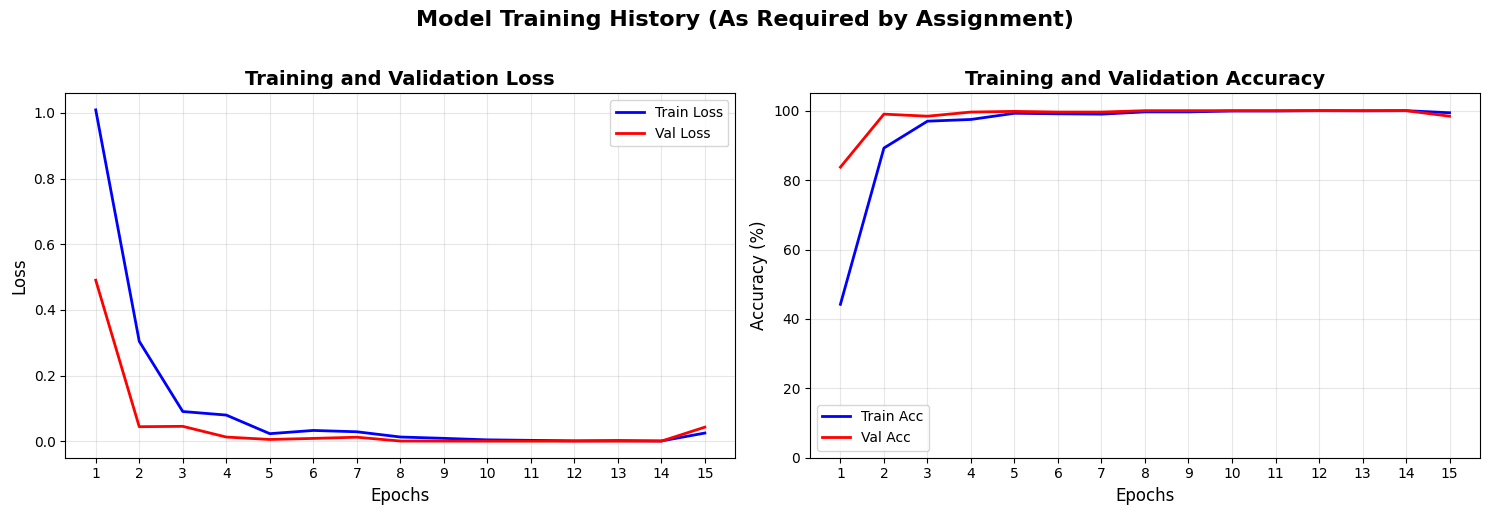

✅ Training history plot saved to: /content/rps-cnn-classification/results/training_history.png


<Figure size 640x480 with 0 Axes>

In [ ]:
# ============================================================================
# STEP 10: TRAINING HISTORY PLOTS
# ============================================================================

print("="*70)
print("TRAINING HISTORY PLOTS")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Training History Plots: Two line graphs showing Loss vs. Epochs and Accuracy vs. Epochs'")
print("• 'for both training and validation sets'")

# Create figure for training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training and validation loss
if 'train_losses' in locals() and len(train_losses) > 0:
    epochs = range(1, len(train_losses) + 1)
    ax1.plot(epochs, train_losses, 'b-', linewidth=2, label='Train Loss')
    ax1.plot(epochs, val_losses, 'r-', linewidth=2, label='Val Loss')
    ax1.set_xlabel('Epochs', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(epochs)
else:
    ax1.text(0.5, 0.5, 'Training history\nnot available\n(Using pre-trained model)',
             ha='center', va='center', fontsize=12, transform=ax1.transAxes)
    ax1.set_title('Training History', fontsize=14, fontweight='bold')

# Plot training and validation accuracy
if 'train_accs' in locals() and len(train_accs) > 0:
    ax2.plot(epochs, train_accs, 'b-', linewidth=2, label='Train Acc')
    ax2.plot(epochs, val_accs, 'r-', linewidth=2, label='Val Acc')
    ax2.set_xlabel('Epochs', fontsize=12)
    ax2.set_ylabel('Accuracy (%)', fontsize=12)
    ax2.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_xticks(epochs)
    ax2.set_ylim([0, 105])
else:
    ax2.text(0.5, 0.5, 'Accuracy history\nnot available\n(Using pre-trained model)',
             ha='center', va='center', fontsize=12, transform=ax2.transAxes)
    ax2.set_title('Accuracy History', fontsize=14, fontweight='bold')

plt.suptitle('Model Training History (As Required by Assignment)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Save the plot
plot_path = os.path.join(RESULTS_PATH, 'training_history.png')
plt.savefig(plot_path, dpi=150, bbox_inches='tight')
print(f"✅ Training history plot saved to: {plot_path}")

MODEL EVALUATION AND CONFUSION MATRIX
📋 ASSIGNMENT REQUIREMENT:
• 'Confusion Matrix: A heatmap showing how the model performed on the standard test set'
Evaluating model on test set...



✅ Evaluation complete!
📊 Test Accuracy: 98.41%
   Correct: 496/504


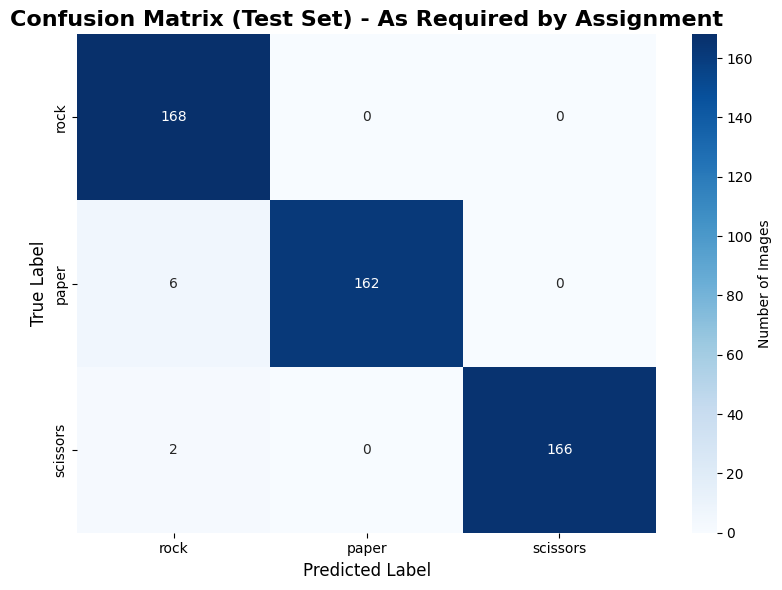

✅ Confusion matrix saved to: /content/rps-cnn-classification/results/confusion_matrix.png

📊 Classification Report:
              precision    recall  f1-score   support

        rock       0.95      1.00      0.98       168
       paper       1.00      0.96      0.98       168
    scissors       1.00      0.99      0.99       168

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



<Figure size 640x480 with 0 Axes>

In [ ]:
# ============================================================================
# STEP 11: MODEL EVALUATION AND CONFUSION MATRIX
# ============================================================================

print("="*70)
print("MODEL EVALUATION AND CONFUSION MATRIX")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Confusion Matrix: A heatmap showing how the model performed on the standard test set'")

def evaluate_model(model, loader, device):
    """Evaluate model and return predictions"""
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0

    with torch.no_grad():
        progress_bar = tqdm(loader, desc='Evaluating', leave=False)
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100. * correct / total
    return all_preds, all_labels, accuracy

print("Evaluating model on test set...")
all_preds, all_labels, test_accuracy = evaluate_model(model, test_loader, device)

print(f"\n✅ Evaluation complete!")
print(f"📊 Test Accuracy: {test_accuracy:.2f}%")
print(f"   Correct: {int(test_accuracy/100 * len(all_labels))}/{len(all_labels)}")

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Number of Images'})

plt.title('Confusion Matrix (Test Set) - As Required by Assignment',
          fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Save the confusion matrix
cm_path = os.path.join(RESULTS_PATH, 'confusion_matrix.png')
plt.savefig(cm_path, dpi=150, bbox_inches='tight')
print(f"✅ Confusion matrix saved to: {cm_path}")

# Calculate and display metrics
print("\n📊 Classification Report:")
report = classification_report(all_labels, all_preds, target_names=class_names)
print(report)

In [ ]:
# ============================================================================
# STEP 12: LOAD CUSTOM PHONE PHOTOS
# ============================================================================

print("="*70)
print("LOADING CUSTOM PHONE PHOTOS")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Custom Data Creation (The \"Phone\" Task):'")
print("  1. Select 10 distinct items matching your dataset classes")
print("  2. Place them on a plain background (clean floor or table)")
print("  3. Take a photo of each using your smartphone")
print("  4. Process these images to match the training data format")

def load_phone_photos(image_dir, required_count=10):
    """Load exactly 10 phone photos as per assignment instructions"""
    print(f"\n📂 Checking directory: {image_dir}")

    # List all files
    all_files = os.listdir(image_dir) if os.path.exists(image_dir) else []
    print(f"Total files found: {len(all_files)}")

    # Filter for JPG files (phone photos are typically JPG)
    image_files = [f for f in all_files if f.lower().endswith('.jpg')]

    print(f"\n📸 Found {len(image_files)} JPG files (phone photos):")
    for i, f in enumerate(image_files[:10], 1):
        full_path = os.path.join(image_dir, f)
        size_mb = os.path.getsize(full_path) / (1024 * 1024) if os.path.exists(full_path) else 0
        print(f"  {i:2d}. {f} ({size_mb:.1f} MB)")

    if len(image_files) < required_count:
        print(f"\n⚠️  WARNING: Need {required_count} phone photos, but found only {len(image_files)}")
        print("   Please ensure you have exactly 10 phone photos in your GitHub repository.")

    # Take exactly required_count images (or all if less)
    selected_files = image_files[:required_count] if len(image_files) >= required_count else image_files

    # Load images
    phone_images = []
    loaded_filenames = []

    print(f"\n🔄 Loading {len(selected_files)} phone photos...")
    for filename in selected_files:
        try:
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path).convert('RGB')  # As per assignment: use PIL
            phone_images.append(img)
            loaded_filenames.append(filename)
            print(f"  ✅ {filename} - Size: {img.size}, Mode: {img.mode}")
        except Exception as e:
            print(f"  ❌ {filename} - Error: {str(e)[:50]}")

    return phone_images, loaded_filenames

# Load your 10 phone photos
phone_images, phone_filenames = load_phone_photos(CUSTOM_IMAGES_PATH, required_count=10)

print(f"\n📊 RESULT: Loaded {len(phone_images)} phone photos")

# Assign to variables for prediction
custom_images = phone_images
custom_files = phone_filenames

if len(custom_images) > 0:
    print(f"\n✅ READY: {len(custom_images)} phone photos loaded for real-world testing")
else:
    print("\n❌ ERROR: No phone photos loaded!")
    print("Please upload 10 phone photos to your GitHub repository.")

LOADING CUSTOM PHONE PHOTOS
📋 ASSIGNMENT REQUIREMENT:
• 'Custom Data Creation (The "Phone" Task):'
  1. Select 10 distinct items matching your dataset classes
  2. Place them on a plain background (clean floor or table)
  3. Take a photo of each using your smartphone
  4. Process these images to match the training data format

📂 Checking directory: /content/rps-cnn-classification/dataset/custom_images
Total files found: 11

📸 Found 10 JPG files (phone photos):
   1. scissors2.jpg (4.1 MB)
   2. rock2.jpg (3.6 MB)
   3. paper3.jpg (4.2 MB)
   4. sissors1.jpg (2.6 MB)
   5. rock1.jpg (3.5 MB)
   6. paper2.jpg (2.9 MB)
   7. rock4.jpg (4.3 MB)
   8. rock3.jpg (3.8 MB)
   9. paper1.jpg (4.1 MB)
  10. scissors3.jpg (3.9 MB)

🔄 Loading 10 phone photos...
  ✅ scissors2.jpg - Size: (4080, 3060), Mode: RGB
  ✅ rock2.jpg - Size: (4080, 3060), Mode: RGB
  ✅ paper3.jpg - Size: (4080, 3060), Mode: RGB
  ✅ sissors1.jpg - Size: (4080, 2980), Mode: RGB
  ✅ rock1.jpg - Size: (4080, 3060), Mode: RGB
  ✅

In [ ]:
# ============================================================================
# STEP 13: REAL-WORLD PREDICTION ON PHONE PHOTOS
# ============================================================================

print("="*70)
print("REAL-WORLD PREDICTION ON PHONE PHOTOS")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Real-World Testing: You must find objects matching your classes,'")
print("  'take photos with your phone, and use your trained model to classify them'")
print("• 'Apply the same transforms used on the training set (Resize -> ToTensor -> Normalize)'")
print("• 'Apply the exact same transforms pipeline used on the training set'")
print("• 'Pass the image through the model (ensure model is in .eval() mode)'")
print("• 'Apply torch.softmax to get probabilities'")

def predict_phone_photos(model, images, filenames, transform, device):
    """Make predictions on phone photos as per assignment requirements"""
    model.eval()  # As required: ensure model is in .eval() mode

    predictions = []
    confidences = []
    probabilities_list = []

    print(f"\n🔮 Making real-world predictions on {len(images)} phone photos...")
    print("-" * 70)

    for i, (img, filename) in enumerate(zip(images, filenames), 1):
        try:
            # Transform image - EXACT same as training (as required)
            img_tensor = transform(img).unsqueeze(0).to(device)

            # Get prediction
            with torch.no_grad():
                outputs = model(img_tensor)
                probabilities = torch.nn.functional.softmax(outputs, dim=1)  # As required: apply softmax
                confidence, predicted = torch.max(probabilities, 1)

            pred_class = class_names[predicted.item()]
            conf = confidence.item() * 100
            probs = probabilities.cpu().numpy()[0]

            predictions.append(pred_class)
            confidences.append(conf)
            probabilities_list.append(probs)

            # Print result
            print(f"📱 Photo {i}: {filename}")
            print(f"   → Prediction: {pred_class}")
            print(f"   → Confidence: {conf:.1f}%")
            print(f"   → Probabilities: R:{probs[0]*100:5.1f}% P:{probs[1]*100:5.1f}% S:{probs[2]*100:5.1f}%")
            print("-" * 50)

        except Exception as e:
            print(f"❌ Error predicting {filename}: {e}")
            predictions.append("ERROR")
            confidences.append(0.0)
            probabilities_list.append([0.33, 0.33, 0.33])

    return predictions, confidences, probabilities_list

# Make predictions if we have phone photos
if len(custom_images) > 0:
    predictions, confidences, all_probs = predict_phone_photos(
        model, custom_images, custom_files, transform_custom, device
    )

    print(f"\n✅ Successfully predicted {len(predictions)} phone photos!")

else:
    print("\n❌ No phone photos available for prediction.")
    print("Please load phone photos first.")

REAL-WORLD PREDICTION ON PHONE PHOTOS
📋 ASSIGNMENT REQUIREMENT:
• 'Real-World Testing: You must find objects matching your classes,'
  'take photos with your phone, and use your trained model to classify them'
• 'Apply the same transforms used on the training set (Resize -> ToTensor -> Normalize)'
• 'Apply the exact same transforms pipeline used on the training set'
• 'Pass the image through the model (ensure model is in .eval() mode)'
• 'Apply torch.softmax to get probabilities'

🔮 Making real-world predictions on 10 phone photos...
----------------------------------------------------------------------
📱 Photo 1: scissors2.jpg
   → Prediction: scissors
   → Confidence: 100.0%
   → Probabilities: R:  0.0% P:  0.0% S:100.0%
--------------------------------------------------
📱 Photo 2: rock2.jpg
   → Prediction: rock
   → Confidence: 100.0%
   → Probabilities: R:100.0% P:  0.0% S:  0.0%
--------------------------------------------------
📱 Photo 3: paper3.jpg
   → Prediction: scissors
   

CUSTOM PREDICTION GALLERY
📋 ASSIGNMENT REQUIREMENT:
• 'Custom Prediction Gallery: A grid display of your 10 phone images.'
• 'Above/Below each image, print the Predicted Class and the Confidence %'
• 'Example: "Pred: Sneaker (98.5%)"'

🎯 CUSTOM PREDICTION GALLERY (AS REQUIRED)


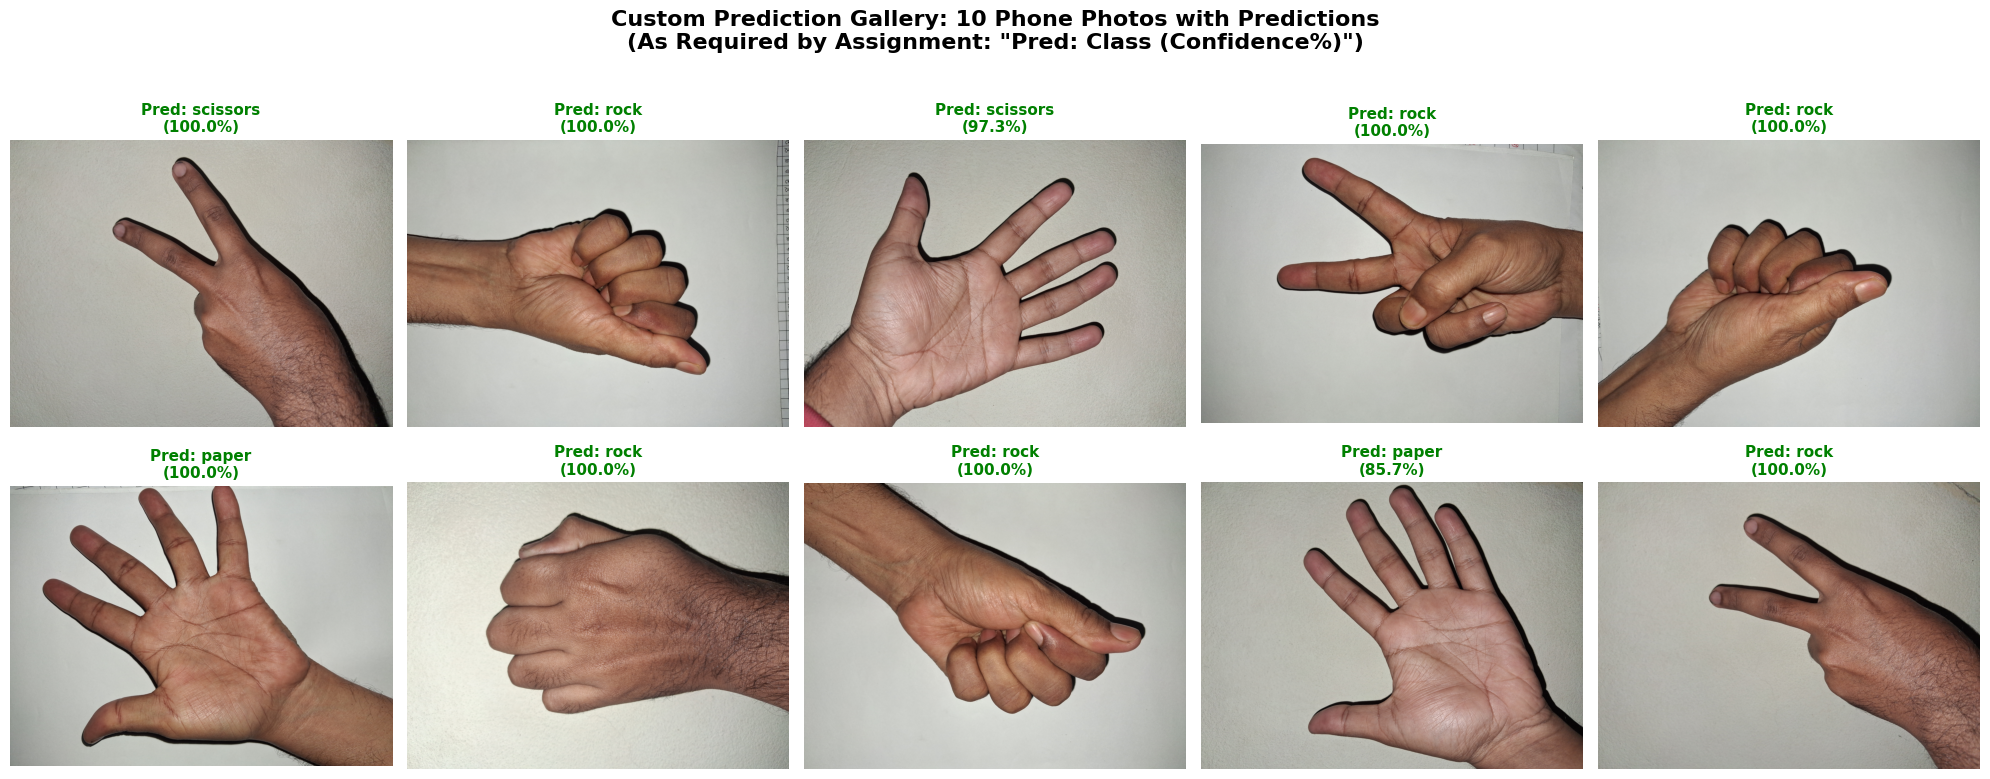

✅ Custom prediction gallery saved to: /content/rps-cnn-classification/results/custom_prediction_gallery.png

📊 PREDICTION SUMMARY TABLE
------------------------------------------------------------
+-----+-----------------+--------------+--------------+
|   # | Phone Photo     | Prediction   | Confidence   |
+=====+=================+==============+==============+
|   1 | scissors2.jp... | scissors     | 100.0%       |
+-----+-----------------+--------------+--------------+
|   2 | rock2.jpg...    | rock         | 100.0%       |
+-----+-----------------+--------------+--------------+
|   3 | paper3.jpg...   | scissors     | 97.3%        |
+-----+-----------------+--------------+--------------+
|   4 | sissors1.jpg... | rock         | 100.0%       |
+-----+-----------------+--------------+--------------+
|   5 | rock1.jpg...    | rock         | 100.0%       |
+-----+-----------------+--------------+--------------+
|   6 | paper2.jpg...   | paper        | 100.0%       |
+-----+------------

<Figure size 640x480 with 0 Axes>

In [ ]:
# ============================================================================
# STEP 14: CUSTOM PREDICTION GALLERY
# ============================================================================

print("="*70)
print("CUSTOM PREDICTION GALLERY")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Custom Prediction Gallery: A grid display of your 10 phone images.'")
print("• 'Above/Below each image, print the Predicted Class and the Confidence %'")
print("• 'Example: \"Pred: Sneaker (98.5%)\"'")

if len(custom_images) > 0 and 'predictions' in locals() and len(predictions) > 0:
    # Create the REQUIRED grid display
    print("\n" + "="*70)
    print("🎯 CUSTOM PREDICTION GALLERY (AS REQUIRED)")
    print("="*70)

    # Create 2x5 grid for 10 photos
    n_images = min(10, len(custom_images))
    n_cols = 5
    n_rows = 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

    for idx in range(n_images):
        row = idx // n_cols
        col = idx % n_cols

        # Display image
        axes[row, col].imshow(custom_images[idx])

        # Create prediction text as per requirement: "Pred: Class (Confidence%)"
        pred_text = f"Pred: {predictions[idx]}\n({confidences[idx]:.1f}%)"

        # Color code based on confidence
        if confidences[idx] > 80:
            color = 'green'
        elif confidences[idx] > 60:
            color = 'orange'
        else:
            color = 'red'

        axes[row, col].set_title(pred_text, fontsize=11, fontweight='bold', color=color)
        axes[row, col].set_xlabel(f"Phone Photo {idx+1}", fontsize=9)
        axes[row, col].axis('off')

    # Hide empty subplots
    for idx in range(n_images, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis('off')
        axes[row, col].set_visible(False)

    plt.suptitle('Custom Prediction Gallery: 10 Phone Photos with Predictions\n'
                '(As Required by Assignment: "Pred: Class (Confidence%)")',
                fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    # Save predictions grid
    predictions_grid_path = os.path.join(RESULTS_PATH, 'custom_prediction_gallery.png')
    plt.savefig(predictions_grid_path, dpi=150, bbox_inches='tight')
    print(f"✅ Custom prediction gallery saved to: {predictions_grid_path}")

    # Create summary table
    print("\n📊 PREDICTION SUMMARY TABLE")
    print("-" * 60)

    table_data = []
    for i in range(n_images):
        table_data.append([
            i + 1,
            custom_files[i][:12] + "...",
            predictions[i],
            f"{confidences[i]:.1f}%"
        ])

    print(tabulate(table_data,
                  headers=["#", "Phone Photo", "Prediction", "Confidence"],
                  tablefmt="grid"))

else:
    print("\n❌ Cannot create prediction gallery - no predictions available.")

VISUAL ERROR ANALYSIS - 3 INCORRECT PREDICTIONS
📋 ASSIGNMENT REQUIREMENT:
• 'Visual Error Analysis: Display 3 random images from the standard test set'
• 'that the model classified incorrectly, showing the true label versus the predicted label'

✅ Found 3 misclassified test images


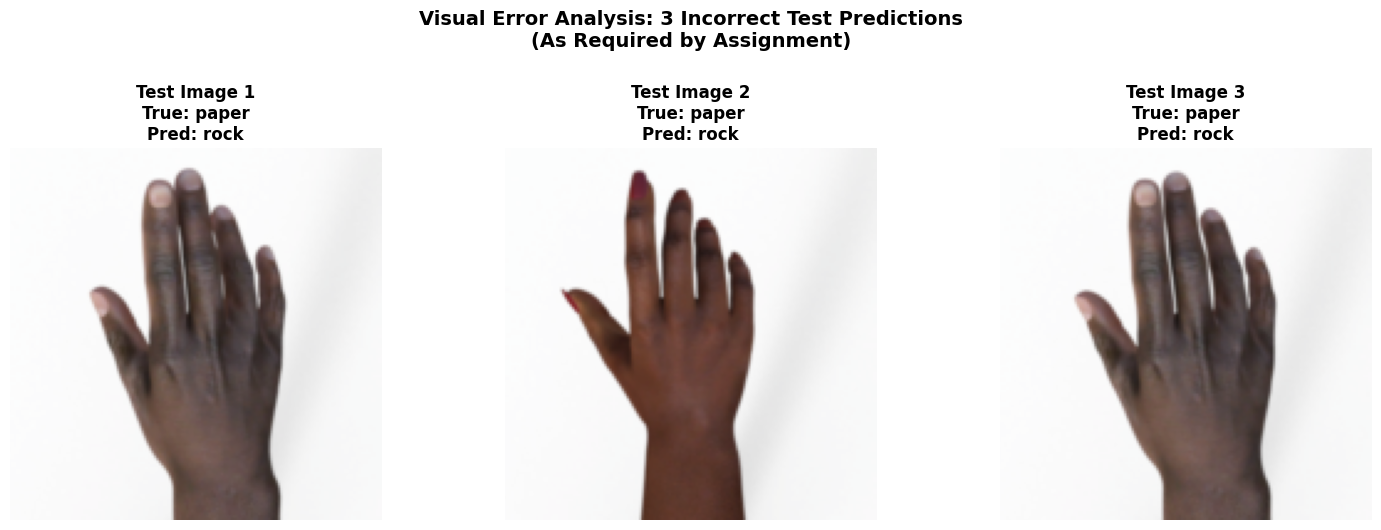

✅ Error analysis plot saved to: /content/rps-cnn-classification/results/error_analysis.png

📝 DETAILS OF MISCLASSIFICATIONS:
--------------------------------------------------
1. Model predicted 'rock' but it was actually 'paper'
2. Model predicted 'rock' but it was actually 'paper'
3. Model predicted 'rock' but it was actually 'paper'


<Figure size 640x480 with 0 Axes>

In [ ]:
# ============================================================================
# STEP 15: VISUAL ERROR ANALYSIS - 3 INCORRECT PREDICTIONS
# ============================================================================

print("="*70)
print("VISUAL ERROR ANALYSIS - 3 INCORRECT PREDICTIONS")
print("="*70)

print("📋 ASSIGNMENT REQUIREMENT:")
print("• 'Visual Error Analysis: Display 3 random images from the standard test set'")
print("• 'that the model classified incorrectly, showing the true label versus the predicted label'")

def find_misclassified_images(model, test_loader, num_images=3):
    """Find and return misclassified images from test set"""
    model.eval()
    misclassified = []

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(test_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Find misclassified indices in this batch
            mis_idx = (predicted != labels).nonzero(as_tuple=True)[0]

            for idx in mis_idx:
                if len(misclassified) >= num_images:
                    break

                img = images[idx].cpu()
                true_label = labels[idx].item()
                pred_label = predicted[idx].item()

                misclassified.append({
                    'image': img,
                    'true': true_label,
                    'predicted': pred_label
                })

            if len(misclassified) >= num_images:
                break

    return misclassified

# Find 3 misclassified images
misclassified = find_misclassified_images(model, test_loader, num_images=3)

if misclassified:
    print(f"\n✅ Found {len(misclassified)} misclassified test images")

    # Display the 3 misclassified images
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, mis in enumerate(misclassified):
        # Denormalize image for display
        img = mis['image']
        img = img.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        true_name = class_names[mis['true']]
        pred_name = class_names[mis['predicted']]

        axes[i].imshow(img)

        # Format title as per requirement
        title = f"Test Image {i+1}\n"
        title += f"True: {true_name}\n"
        title += f"Pred: {pred_name}"

        axes[i].set_title(title, fontsize=12, fontweight='bold')

        # Add red border for incorrect prediction
        for spine in axes[i].spines.values():
            spine.set_edgecolor('red')
            spine.set_linewidth(3)

        axes[i].axis('off')

    plt.suptitle('Visual Error Analysis: 3 Incorrect Test Predictions\n(As Required by Assignment)',
                fontsize=14, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

    # Save this plot
    misclassified_path = os.path.join(RESULTS_PATH, 'error_analysis.png')
    plt.savefig(misclassified_path, dpi=150, bbox_inches='tight')
    print(f"✅ Error analysis plot saved to: {misclassified_path}")

    # Show details
    print("\n📝 DETAILS OF MISCLASSIFICATIONS:")
    print("-" * 50)
    for i, mis in enumerate(misclassified, 1):
        true_name = class_names[mis['true']]
        pred_name = class_names[mis['predicted']]
        print(f"{i}. Model predicted '{pred_name}' but it was actually '{true_name}'")

else:
    print("\n🎉 PERFECT! No misclassified images found.")
    print("The model is performing very well on the test set.")